In [20]:
import pandas as pd
import re
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
animes_df = pd.read_csv("./data/animes.csv")
profiles_df = pd.read_csv("./data/profiles.csv")
reviews_df = pd.read_csv("./data/reviews.csv")

In [10]:
# Cleaning profiles
def standardize_birthday(date_str):
    if pd.isnull(date_str) or len(date_str.split()) != 3:
        return pd.NaT
    return pd.to_datetime(date_str, errors='coerce')

profiles_df['birthday'] = profiles_df['birthday'].apply(standardize_birthday)

profiles_df['favorites_anime'] = profiles_df['favorites_anime'].apply(lambda x: eval(x) if pd.notnull(x) else [])
profiles_df['favorites_anime_count'] = profiles_df['favorites_anime'].apply(len)

In [11]:
# Cleaning reviews
def clean_review(text):
    text = re.sub(r'^(.*more pics\s*Overall\s*\d+\s*Story\s*\d+\s*Animation\s*\d+\s*Sound\s*\d+\s*Character\s*\d+\s*Enjoyment\s*\d+\s*)', '', text, flags=re.DOTALL)
    text = text.strip()
    return text

reviews_df['cleaned_text'] = reviews_df['text'].apply(clean_review)

def extract_scores(score_dict):
    try:
        score_dict = ast.literal_eval(score_dict)
        return score_dict.get('Overall', 0), score_dict.get('Story', 0), score_dict.get('Animation', 0), score_dict.get('Sound', 0), score_dict.get('Character', 0), score_dict.get('Enjoyment', 0)
    except (ValueError, SyntaxError) as e:
        return 0, 0, 0, 0, 0, 0

reviews_df.drop(columns=['text'], inplace=True)
reviews_df[['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']] = reviews_df['scores'].apply(extract_scores).apply(pd.Series)
reviews_df.drop(columns=['scores'], inplace=True)

,uid,profile,anime_uid,score,link,cleaned_text,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,9,8
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,10,10
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,8,8
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,10,9
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,9,https://myanimelist.net/reviews.php?id=240067,"Ok, this anime is pretty old, but here's the b...",9,5,10,10,9,9
192108,285777,ShizzoSVH,1281,9,https://myanimelist.net/reviews.php?id=285777,The dub for this anime is made this anime a fu...,9,7,9,9,9,10
192109,286904,AlluMan96,1281,3,https://myanimelist.net/reviews.php?id=286904,Some might argue that doing a review of a show...,3,3,1,2,2,5
192110,287903,AgentK300,1281,10,https://myanimelist.net/reviews.php?id=287903,Absolutely hilarious. \r\nI accidentally came ...,10,3,3,3,3,10


In [12]:
animes_df

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [13]:
profiles_df

,profile,gender,birthday,favorites_anime,link,favorites_anime_count
0,DesolatePsyche,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
1,baekbeans,Female,2000-11-10,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",https://myanimelist.net/profile/baekbeans,10
2,skrn,NaN,NaT,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",https://myanimelist.net/profile/skrn,9
3,edgewalker00,Male,NaT,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00,5
4,aManOfCulture99,Male,1999-10-30,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",https://myanimelist.net/profile/aManOfCulture99,10
...,...,...,...,...,...,...
81722,lovelessxd,Female,1992-08-06,"[853, 5114]",https://myanimelist.net/profile/lovelessxd,2
81723,Shattered_Angel,Female,1994-09-06,"[150, 27, 1520, 121, 31452, 32995, 877, 14713,...",https://myanimelist.net/profile/Shattered_Angel,10
81724,FluffyWalrus,Male,NaT,"[121, 43, 237, 202, 205]",https://myanimelist.net/profile/FluffyWalrus,5
81725,camco,Female,NaT,"[199, 4224, 7054, 13601, 14713]",https://myanimelist.net/profile/camco,5


In [14]:
reviews_df

,uid,profile,anime_uid,score,link,cleaned_text,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,9,8
1,259117,baekbeans,34599,10,https://myanimelist.net/reviews.php?id=259117,Let me start off by saying that Made in Abyss ...,10,10,10,10,10,10
2,253664,skrn,28891,7,https://myanimelist.net/reviews.php?id=253664,"Art 9/10: It is great, especially the actions ...",7,7,9,8,8,8
3,8254,edgewalker00,2904,9,https://myanimelist.net/reviews.php?id=8254,Story \r\n \r\ntaking place 1 yr from where se...,9,9,9,10,10,9
4,291149,aManOfCulture99,4181,10,https://myanimelist.net/reviews.php?id=291149,Kyoto Animations greatest strength is being ab...,10,10,8,9,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...
192107,240067,Unicorn819,1281,9,https://myanimelist.net/reviews.php?id=240067,"Ok, this anime is pretty old, but here's the b...",9,5,10,10,9,9
192108,285777,ShizzoSVH,1281,9,https://myanimelist.net/reviews.php?id=285777,The dub for this anime is made this anime a fu...,9,7,9,9,9,10
192109,286904,AlluMan96,1281,3,https://myanimelist.net/reviews.php?id=286904,Some might argue that doing a review of a show...,3,3,1,2,2,5
192110,287903,AgentK300,1281,10,https://myanimelist.net/reviews.php?id=287903,Absolutely hilarious. \r\nI accidentally came ...,10,3,3,3,3,10


In [16]:
reviews_animes_df = pd.merge(reviews_df, animes_df, left_on='anime_uid', right_on='uid', suffixes=('_review', '_anime'))

full_df = pd.merge(reviews_animes_df, profiles_df, left_on='profile', right_on='profile', suffixes=('', '_profile'))

In [24]:
full_df

,uid_review,profile,anime_uid,score_review,link_review,cleaned_text,Overall,Story,Animation,Sound,...,popularity,ranked,score_anime,img_url,link_anime,gender,birthday,favorites_anime,link,favorites_anime_count
0,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
1,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
2,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
3,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
4,255938,DesolatePsyche,34096,8,https://myanimelist.net/reviews.php?id=255938,"First things first. My ""reviews"" system is exp...",8,8,8,10,...,800,15.0,8.94,https://cdn.myanimelist.net/images/anime/3/835...,https://myanimelist.net/anime/34096/Gintama,Male,1994-10-02,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811631,299323,Scarlet012,1281,9,https://myanimelist.net/reviews.php?id=299323,This will be a review for the English dubbed v...,9,7,8,5,...,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...,NaN,NaT,[11111],https://myanimelist.net/profile/Scarlet012,1
811632,299323,Scarlet012,1281,9,https://myanimelist.net/reviews.php?id=299323,This will be a review for the English dubbed v...,9,7,8,5,...,1313,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...,NaN,NaT,[11111],https://myanimelist.net/profile/Scarlet012,1
811633,299323,Scarlet012,1281,9,https://myanimelist.net/reviews.php?id=299323,This will be a review for the English dubbed v...,9,7,8,5,...,1313,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...,NaN,NaT,[11111],https://myanimelist.net/profile/Scarlet012,1
811634,299323,Scarlet012,1281,9,https://myanimelist.net/reviews.php?id=299323,This will be a review for the English dubbed v...,9,7,8,5,...,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...,NaN,NaT,[11111],https://myanimelist.net/profile/Scarlet012,1


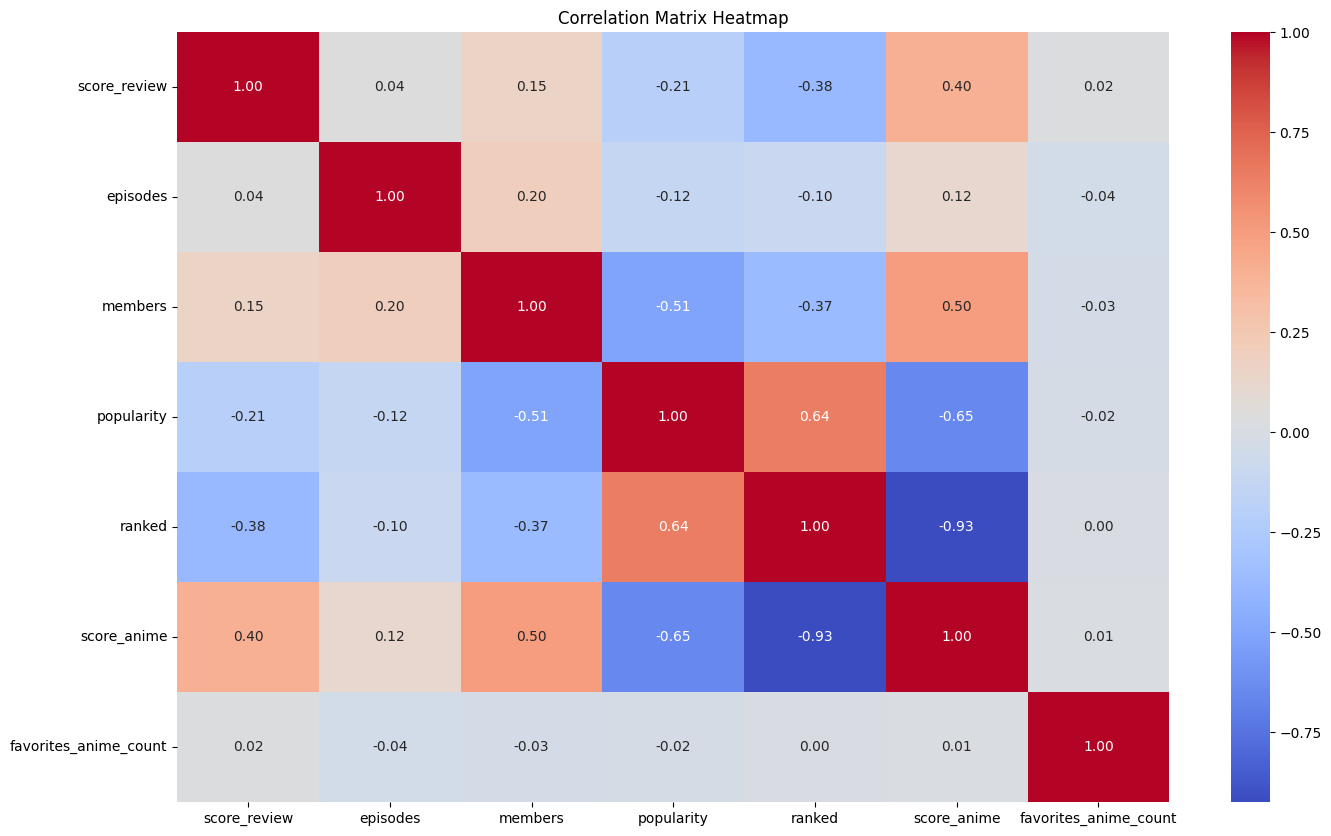

In [26]:
numeric_df = full_df.select_dtypes(include=['float64', 'int64']).drop(columns=['uid_review', 'anime_uid', 'uid_anime'])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
